In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB




import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Drazenoic, Mr. Jozef",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:

df["Survived"]=df["Survived"].map({1:'yes', 0:'no'})
df["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

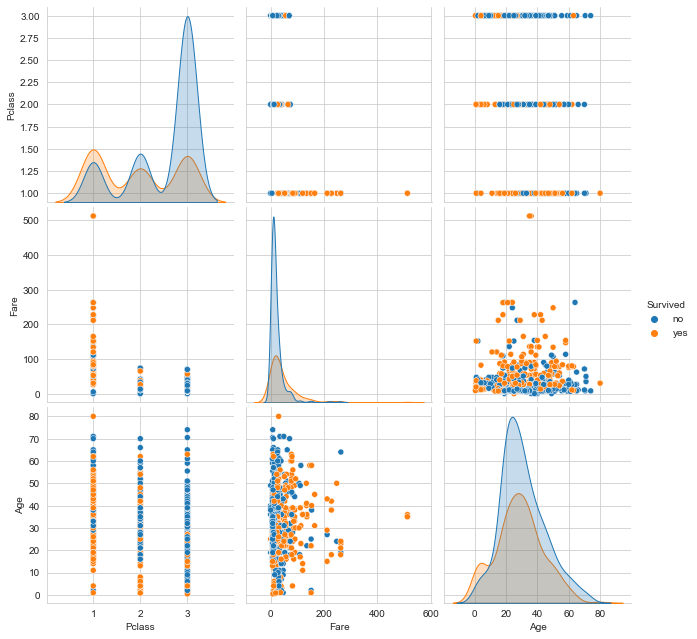

In [7]:
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show

<AxesSubplot:xlabel='Survived', ylabel='count'>

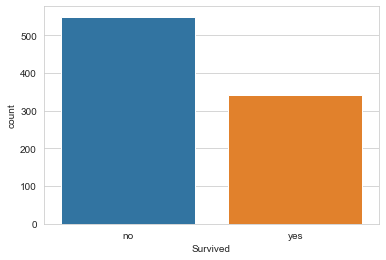

In [8]:
sns.countplot(df["Survived"],data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

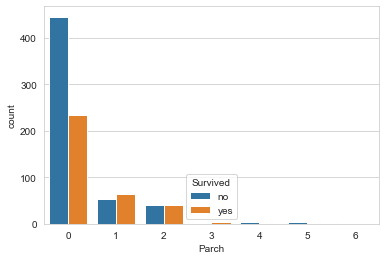

In [9]:
sns.countplot(df["Parch"] , hue=df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

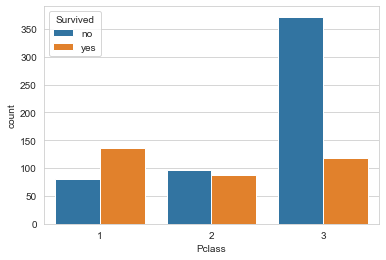

In [10]:
sns.countplot(df["Pclass"],hue=df["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

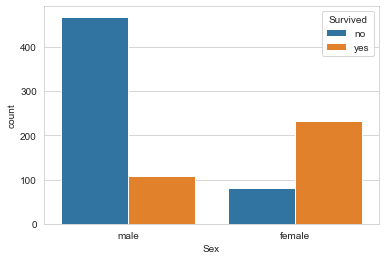

In [11]:
sns.countplot(df["Sex"],hue=df["Survived"])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

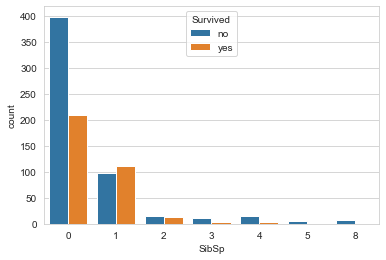

In [12]:
sns.countplot(df["SibSp"],hue=df["Survived"])

<AxesSubplot:>

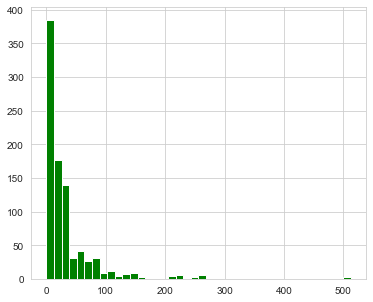

In [13]:
df['Fare'].hist(color='green',bins=40,figsize=(6,5))

<AxesSubplot:>

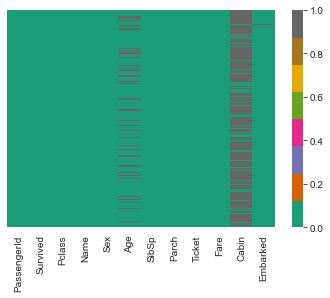

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="Dark2")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

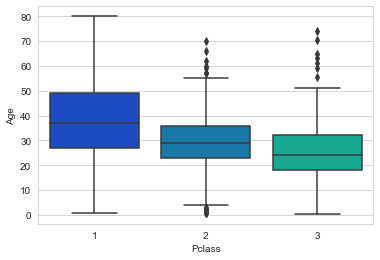

In [15]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [16]:
def impute_age(cols):
        Age=cols[0]
        Pclass=cols[1]
        
        if pd.isnull(Age):
            if Pclass==1:
                return 37
            elif Pclass ==2:
                return 29
            else:
                return 24
        return Age

In [17]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

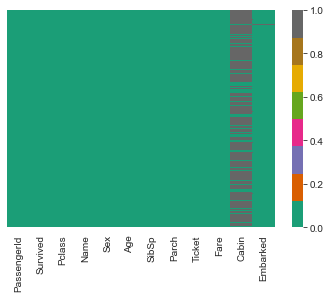

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="Dark2")

In [19]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

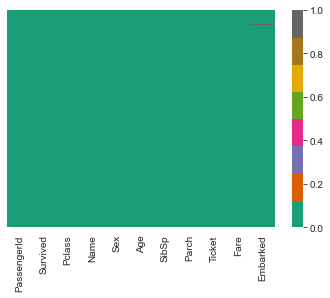

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='Dark2')

In [21]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [22]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,no,3,male,22.0,1,0,7.2500,S
1,2,yes,1,female,38.0,1,0,71.2833,C
2,3,yes,3,female,26.0,0,0,7.9250,S
3,4,yes,1,female,35.0,1,0,53.1000,S
4,5,no,3,male,35.0,0,0,8.0500,S


In [23]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [24]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,no,3,male,22.0,1,0,7.2500,S
1,2,yes,1,female,38.0,1,0,71.2833,C
2,3,yes,3,female,26.0,0,0,7.9250,S
3,4,yes,1,female,35.0,1,0,53.1000,S
4,5,no,3,male,35.0,0,0,8.0500,S


In [25]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,no,3,22.0,1,0,7.2500
1,2,yes,1,38.0,1,0,71.2833
2,3,yes,3,26.0,0,0,7.9250
3,4,yes,1,35.0,1,0,53.1000
4,5,no,3,35.0,0,0,8.0500


In [26]:
df=pd.concat([df,sex,embark],axis=1)

In [27]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,no,3,22.0,1,0,7.2500,1,0,1
1,2,yes,1,38.0,1,0,71.2833,0,0,0
2,3,yes,3,26.0,0,0,7.9250,0,0,1
3,4,yes,1,35.0,1,0,53.1000,0,0,1
4,5,no,3,35.0,0,0,8.0500,1,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],
test_size=0.30,random_state=101)

In [31]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
predictions=logmodel.predict(X_test)

In [33]:
predictions

array(['no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       '

In [38]:
from sklearn.metrics import confusion_matrix

In [41]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[133,  21],
       [ 37,  77]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7835820895522388